In [226]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.model_selection import cross_validate, train_test_split, StratifiedShuffleSplit
from sklearn import linear_model, metrics
from sklearn.linear_model import SGDClassifier as SGD
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import GradientBoostingClassifier
from sklearn import preprocessing

In [239]:
from plotly.subplots import make_subplots
import plotly.graph_objects as go
import plotly.express as px
import plotly.offline
import random as rd
import matplotlib.pyplot as plt

In [256]:
def BoxPlBin(DF0, DF1, colname): # Функция построения ящиков с усами в цикле
    fig = go.Figure()
    fig.add_trace(go.Box(y=DF0[colname].dropna(), name = "Да", boxpoints='all', boxmean=True))
    fig.add_trace(go.Box(y=DF1[colname].dropna(), name = "Нет", boxpoints='all', boxmean=True))
    fig.update_layout(title=colname, title_x=0.5)
    fig.show()

In [257]:
def convertonum(x, unique_list): # Функция для автоматического конвертирования качественных переменных из строк в числа
    for i in range(len(unique_list)):
        if x == unique_list[i]:
            return i
    

In [216]:
train_directory = "data/train.csv"

train = pd.read_csv(train_directory, header=0 )

train['y'] = [1 if y == 'yes' else 0 for y in train['y']]

In [217]:
train

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,30,blue-collar,married,basic.9y,no,yes,no,cellular,may,fri,...,2,999,0,nonexistent,-1.8,92.893,-46.2,1.313,5099.1,0
1,39,services,single,high.school,no,no,no,telephone,may,fri,...,4,999,0,nonexistent,1.1,93.994,-36.4,4.855,5191.0,0
2,25,services,married,high.school,no,yes,no,telephone,jun,wed,...,1,999,0,nonexistent,1.4,94.465,-41.8,4.962,5228.1,0
3,38,services,married,basic.9y,no,unknown,unknown,telephone,jun,fri,...,3,999,0,nonexistent,1.4,94.465,-41.8,4.959,5228.1,0
4,47,admin.,married,university.degree,no,yes,no,cellular,nov,mon,...,1,999,0,nonexistent,-0.1,93.200,-42.0,4.191,5195.8,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3217,47,services,married,high.school,no,no,no,cellular,aug,fri,...,1,999,0,nonexistent,1.4,93.444,-36.1,4.966,5228.1,0
3218,55,blue-collar,married,basic.6y,unknown,no,no,cellular,jul,tue,...,4,999,0,nonexistent,1.4,93.918,-42.7,4.961,5228.1,0
3219,46,blue-collar,married,basic.6y,unknown,yes,no,telephone,may,wed,...,2,999,0,nonexistent,1.1,93.994,-36.4,4.856,5191.0,0
3220,24,student,single,high.school,no,yes,no,cellular,apr,thu,...,1,999,0,nonexistent,-1.8,93.075,-47.1,1.365,5099.1,0


In [258]:
YesDF = train[train['y'] == 1] # Сразу разобьем на две выборки "Да" и "Нет"
NoDF = train[train['y'] == 0]

In [212]:
for col in train.columns.values[:-1]:
    BoxPlBin(YesDF, NoDF, col)

In [ ]:
''' Из первичного анализа с помощью боксплотов, можно выделить влияющие штуки и добавить в выборку. Здесь:
 - job,
 - contact,
 - duration,
 - campaign,
 - poutcome,
 - emp.var.rate
 - euribor3m
 - nr.employed
'''

In [ ]:
# Теперь перекодируем отобранные строковые факторы в числовые

In [219]:
train["job"] = train["job"].apply(lambda x: convertonum(x, train["job"].unique().tolist()))
train["contact"] = train["contact"].apply(lambda x: convertonum(x, train["contact"].unique().tolist()))
train["poutcome"] = train["poutcome"].apply(lambda x: convertonum(x, train["poutcome"].unique().tolist()))

In [230]:
X = train[['age' , 'previous']][:]
y = train['y'][:]
classifier = RandomForestClassifier()
rslist = []
for i in range(20): # Так как у нас постоянно рандомное разбиение, будем брать средний roc_auc хотя бы по двадцати моделям
    train_data, test_data, train_labels, test_labels = train_test_split(X, y, test_size = 0.2)
    classifier.fit(train_data , train_labels)
    pred_labels = classifier.predict(test_data)
    rslist.append(metrics.roc_auc_score(test_labels, pred_labels))
np.asarray(rslist).mean() 

0.5403519859836792

In [ ]:
#BaseLine дает результат от 0.5 - 0.55. Добавим отобранные выше факторы.

In [259]:
X = train[['age', 'previous', 'job', 'contact', 'duration', 'campaign', 'poutcome', 'emp.var.rate', 'euribor3m', 'nr.employed']][:]
y = train['y'][:]
rslist = []
for i in range(20):
    train_data, test_data, train_labels, test_labels = train_test_split(X, y, test_size = 0.2)
    classifier = RandomForestClassifier()
    classifier.fit(train_data , train_labels)
    pred_labels = classifier.predict(test_data)
    rslist.append(metrics.roc_auc_score(test_labels, pred_labels))
np.asarray(rslist).mean()    

0.7014714300606248

In [ ]:
#С помощью первичного анализа удалось достигнуть прибавки к точности порядка 15-20%. Теперь точность порядка 0.68 - 0.72.

In [ ]:
#Попробуем, теперь, регрессионную модель

In [260]:
X = train[['age' , 'previous', 'job', 'contact', 'duration', 'campaign', 'poutcome', 'emp.var.rate', 'euribor3m', 'nr.employed']][:]
y = train['y'][:]
rslist2 = []
regressor = RandomForestRegressor()
for i in range(20):
    train_data2, test_data2, train_labels2, test_labels2 = train_test_split(X, y, test_size = 0.2)
    regressor.fit(train_data2 , train_labels2)
    pred_labels2 = regressor.predict(test_data2)
    rslist2.append(metrics.roc_auc_score(test_labels2, pred_labels2))
np.asarray(rslist2).mean()   

0.915062661586553

In [ ]:
# Регрессионная модель дает результат на 20% лучше. Построим гистограммы для понимания.

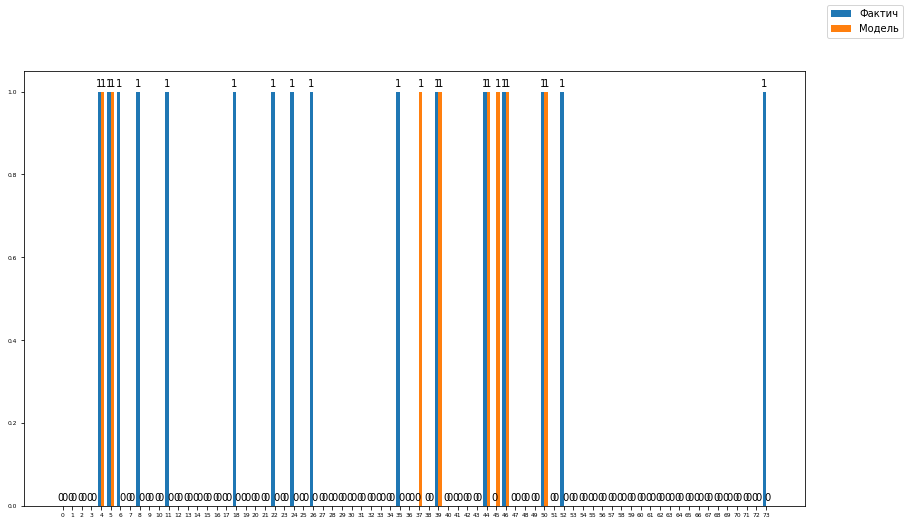

In [262]:
labels = np.arange(len(pred_labels[1:75])) # Гистограмма для классификатора
pred = pred_labels[1:75]
real = test_labels[1:75]
x = np.arange(len(labels))
width = 0.35
fig, ax = plt.subplots()
fig.set_size_inches(14, 8)
rects1 = ax.bar(x - width/2, real, width, label='Фактич')
rects2 = ax.bar(x + width/2, pred, width, label='Модель')
ax.set_xticks(x)
ax.tick_params(axis='both', which='major', labelsize=6)
ax.set_xticklabels(labels)
def autolabel(rects):
    for rect in rects:
        height = round(rect.get_height(),1)
        ax.annotate('{}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3), 
                    textcoords="offset points",
                    ha='center', va='bottom')

autolabel(rects1)
autolabel(rects2)
fig.legend()

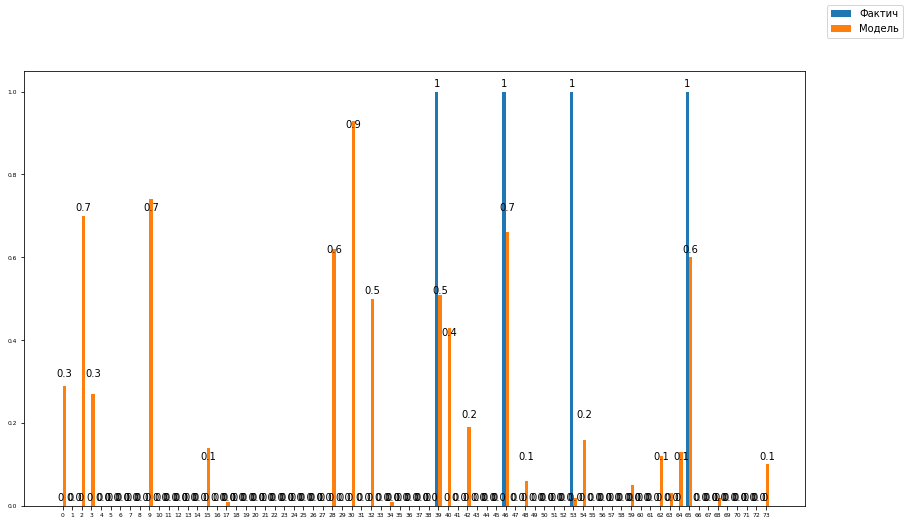

In [261]:
labels = np.arange(len(pred_labels2[1:75]))  # Гистограмма для регрессора
pred = pred_labels2[1:75]
real = test_labels2[1:75]

x = np.arange(len(labels))
width = 0.35

fig, ax = plt.subplots()
fig.set_size_inches(14, 8)
rects1 = ax.bar(x - width/2, real, width, label='Фактич')
rects2 = ax.bar(x + width/2, pred, width, label='Модель')
ax.set_xticks(x)
ax.tick_params(axis='both', which='major', labelsize=6)
ax.set_xticklabels(labels)
def autolabel(rects):
    for rect in rects:
        height = round(rect.get_height(),1)
        ax.annotate('{}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),
                    textcoords="offset points",
                    ha='center', va='bottom')

autolabel(rects1)
autolabel(rects2)
fig.legend()

In [ ]:
''' Таким образом, можно сделать вывод, что регрессор показывает вероятность того, что пользователь уйдет в просроченный платеж,
и, в данном случае, выгоднее с точки зрения точности модели.

'''

Кросс-валидация

In [263]:
sss = StratifiedShuffleSplit(n_splits=5, test_size=0.2, random_state=0) 

In [265]:
rslistfoldlist = []
i = 0
for train_index, test_index in sss.split(X, y):
    i+=1
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y[train_index], y[test_index]
    regressor = RandomForestRegressor()
    slist = []
    for k in range(10):
        train_data, test_data, train_labels, test_labels = train_test_split(X, y, test_size = 0.3)
        regressor.fit(train_data , train_labels)
        pred_labels = regressor.predict(test_data)
        rslist.append(metrics.roc_auc_score(test_labels, pred_labels))
    rslistfoldlist.append(np.asarray(rslist).mean())
    print(f"Фолд {i} - {np.asarray(rslist).mean()}")

np.asarray(rslistfoldlist).mean()

Фолд 1 - 0.8636966238434856
Фолд 2 - 0.8694677512292243
Фолд 3 - 0.8736373267574661
Фолд 4 - 0.8776928483251482
Фолд 5 - 0.8812967485590734


0.8731582597428794

In [ ]:
''' 
1) Можно использовать другие модели, помимо деревьев.
2) Поиграться с параметрами моеделей.
3) Нормировка
4) Цикл по факторам модели для оценки точности со случайным количеством факторов, в поисках лучшей комбинации.
5) Проверка на коллинеарность факторов между собой попарно.
...
6) PROFIT


'''